[*********************100%***********************]  1 of 1 completed

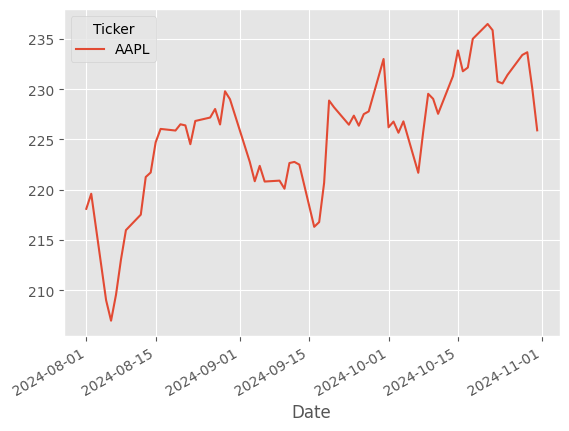

In [69]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web
import yfinance as yf

style.use('ggplot')
start = dt.datetime(2024, 8, 1)
end = dt.datetime(2024,11,1)
data = yf.download("AAPL", start = start, end = end , interval = '1d')
# df.to_csv('aapl.csv')
# df = pd.read_csv('aapl.csv', parse_dates = True, index_col=0)
data["Adj Close"].plot()
plt.show()


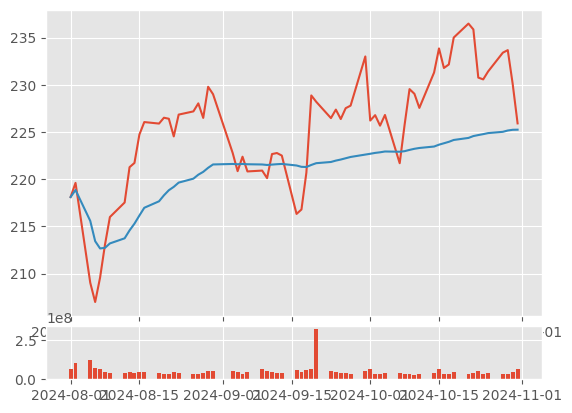

In [70]:
data["100ma"] = data["Adj Close"].rolling(window=100, min_periods=0).mean()
ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)
ax1.plot(data.index, data["Adj Close"])
ax1.plot(data.index, data["100ma"])
ax2.bar(data.index, data["Volume"]["AAPL"])
plt.show()




In [71]:
# resample the data

import talib

data.columns = data.columns.droplevel("Ticker")
# Resample data to create K-line intervals, for example, every 5 days
k_interval = '1D'
k_line_data = data.resample(k_interval).agg({
    'Open': 'first',
    'High': 'max',
    'Low': 'min',
    'Close': 'last',
    'Volume': 'sum'
})
print(k_line_data.head())
# Calculate moving averages
k_line_data['MA_10'] = k_line_data['Close'].rolling(window=10).mean()  # 10-interval moving average
k_line_data['MA_20'] = k_line_data['Close'].rolling(window=20).mean()  # 20-interval moving average

# Identify crossover patterns
k_line_data['Signal'] = 0
k_line_data['Signal'][10:] = [
    1 if k_line_data['MA_10'][i] > k_line_data['MA_20'][i] else -1 
    for i in range(10, len(k_line_data))
]
k_line_data['Position'] = k_line_data['Signal'].diff()

# Show buy (1) and sell (-1) signals
print(k_line_data[['MA_10', 'MA_20', 'Signal', 'Position']].tail())


Price                            Open        High         Low       Close  \
Date                                                                        
2024-08-01 00:00:00+00:00  224.369995  224.479996  217.020004  218.360001   
2024-08-02 00:00:00+00:00  219.149994  225.600006  217.710007  219.860001   
2024-08-03 00:00:00+00:00         NaN         NaN         NaN         NaN   
2024-08-04 00:00:00+00:00         NaN         NaN         NaN         NaN   
2024-08-05 00:00:00+00:00  199.089996  213.500000  196.000000  209.270004   

Price                         Volume  
Date                                  
2024-08-01 00:00:00+00:00   62501000  
2024-08-02 00:00:00+00:00  105568600  
2024-08-03 00:00:00+00:00          0  
2024-08-04 00:00:00+00:00          0  
2024-08-05 00:00:00+00:00  119548600  
Price                      MA_10  MA_20  Signal  Position
Date                                                     
2024-10-27 00:00:00+00:00    NaN    NaN      -1       0.0
2024-10-28 00

C:\Users\wattx\AppData\Local\Temp\ipykernel_19372\1503584197.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  1 if k_line_data['MA_10'][i] > k_line_data['MA_20'][i] else -1
C:\Users\wattx\AppData\Local\Temp\ipykernel_19372\1503584197.py:22: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead

In [72]:
# Identify patterns, e.g., Doji
k_line_data['Doji'] = talib.CDLDOJI(
    k_line_data['Open'], 
    k_line_data['High'], 
    k_line_data['Low'], 
    k_line_data['Close']
)

# Filter rows where Doji pattern is detected
doji_pattern = k_line_data[k_line_data['Doji'] != 0]
print(doji_pattern[['Open', 'High', 'Low', 'Close', 'Doji']])


Empty DataFrame
Columns: [Open, High, Low, Close, Doji]
Index: []


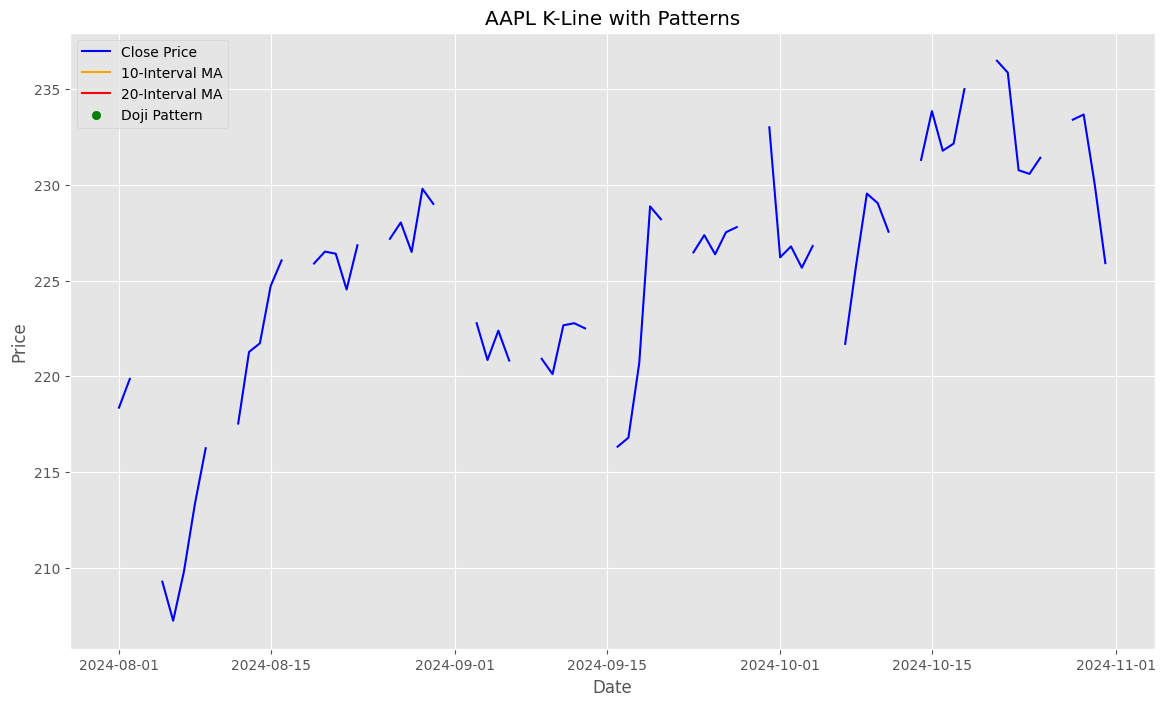

In [73]:
import matplotlib.pyplot as plt

# Plot K-line data with patterns highlighted
plt.figure(figsize=(14, 8))
plt.plot(k_line_data['Close'], label='Close Price', color='blue')
plt.plot(k_line_data['MA_10'], label='10-Interval MA', color='orange')
plt.plot(k_line_data['MA_20'], label='20-Interval MA', color='red')
plt.scatter(doji_pattern.index, doji_pattern['Close'], label='Doji Pattern', color='green', marker='o')
plt.title(f'{ticker} K-Line with Patterns')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [75]:
talib.RSI(data["Close"],timeperiod=14)

Date
2024-08-01 00:00:00+00:00          NaN
2024-08-02 00:00:00+00:00          NaN
2024-08-05 00:00:00+00:00          NaN
2024-08-06 00:00:00+00:00          NaN
2024-08-07 00:00:00+00:00          NaN
                               ...    
2024-10-25 00:00:00+00:00    53.682380
2024-10-28 00:00:00+00:00    56.788588
2024-10-29 00:00:00+00:00    57.207914
2024-10-30 00:00:00+00:00    50.262768
2024-10-31 00:00:00+00:00    43.576160
Length: 65, dtype: float64